In [64]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

(250, 2) (250, 2)
[ 0.44958895  2.05008187]


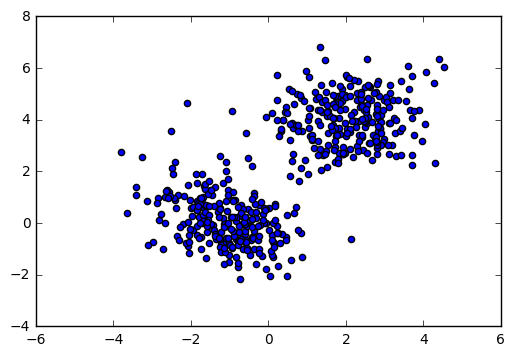

In [6]:
mean_01 = np.array([2.0, 4.0])
mean_02 = np.array([-1.0, 0.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.9, -0.4], [-0.4, 0.9]])

dt1 = np.random.multivariate_normal(mean_01, cov_01, 250)
dt2 = np.random.multivariate_normal(mean_02, cov_02, 250)

print dt1.shape, dt2.shape
data = np.zeros((500, 2))
data[:250, :] = dt1
data[250:, :] = dt2

print data.mean(axis=0)

plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [29]:
cluster_centers = {
    0: {
        'center': np.array([-2.0, -2.0]),
        'pts': []
    },
    1: {
        'center': np.array([-1.5, 1.0]),
        'pts': []
    },
    2: {
        'center': np.array([1.5, 1.9]),
        'pts': []
    }
}

def dist(x1, x2):
    # Eucledian distance
    # x1 and x2 are two vector points
    # ex: x1 = [1.0, -0.3]
    diff = (x1 - x2)
    diff_sq = diff**2
    sum_diff = diff_sq.sum()
    return np.sqrt(sum_diff)

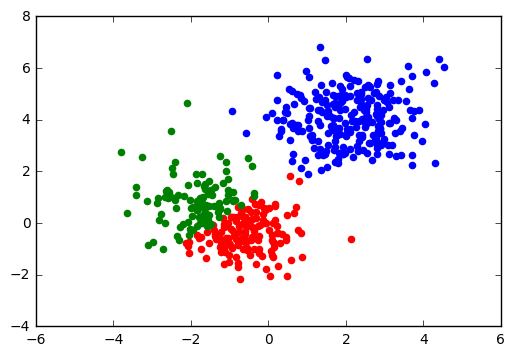

In [36]:
for ix in range(data.shape[0]):
    distances = []
    for cx in cluster_centers.keys():
        comp_dist = dist(cluster_centers[cx]['center'], data[ix, :])
        distances.append([comp_dist, cx])
    best_dist = sorted(distances)[0]
    best_center = cluster_centers[best_dist[1]]
    cluster_centers[best_dist[1]]['pts'].append(data[ix])

# Time to compute new cluster centers
cols = ['red', 'green', 'blue']
plt.figure(0)
for cx in cluster_centers.keys():
    if not len(cluster_centers[cx]['pts'])==0:
        points = np.asarray(cluster_centers[cx]['pts'])
        new_center = points.mean(axis=0)
        plt.scatter(points[:, 0], points[:, 1], color=cols[cx])
        cluster_centers[cx]['pts'] = []
        cluster_centers[cx]['center'] = new_center
    else:
        pass
plt.show()

In [37]:
from sklearn.cluster import KMeans

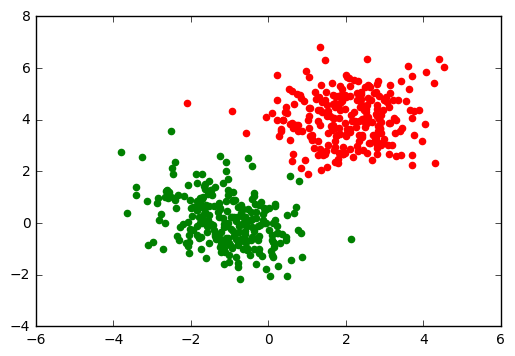

In [46]:
km = KMeans(n_clusters=2)

km.fit(data)

plt.figure(0)
for ix in range(data.shape[0]):
    plt.scatter(data[ix, 0], data[ix, 1], color=cols[km.labels_[ix]])
plt.show()

In [96]:
im = cv2.imread('./Desktop/img_trump.jpg')
print im.shape
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (400, 300))

print im.shape

(3204, 4272, 3)
(300, 400, 3)


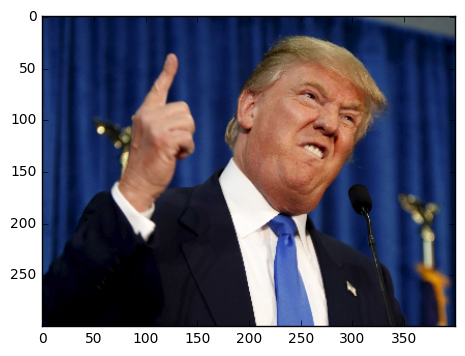

In [97]:
plt.figure(0)
plt.imshow(im)
plt.show()

In [98]:
all_pixels = im.reshape((400*300, 3))
print all_pixels.shape

(120000, 3)


In [103]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

print km.cluster_centers_

[[  13.57020975   16.71080037   33.54569012]
 [ 238.57584567  231.98176533  225.43023256]
 [  25.01861133   45.85209458   98.65321683]
 [ 163.95175968  116.5438109    94.38169445]]


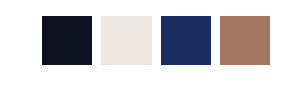

[array([242, 239, 222], dtype=uint8), array([17, 24, 30], dtype=uint8), array([230, 210, 157], dtype=uint8), array([ 92, 139, 161], dtype=uint8)]


In [104]:
i = 1
plt.figure(0)
colors = []
for each_col in km.cluster_centers_:
    plt.subplot(1, 8, i)
    plt.axis("off")
    i+= 1
    col = each_col.astype('uint8')
    colors.append(255-col)
    a = np.zeros((100, 100, 3))
    a[:, :, :] = col
    plt.imshow(255-a)
plt.show()
print colors

In [105]:
img = np.zeros((400*300, 3))
for ix in range(img.shape[0]):
    img[ix] = colors[km.labels_[ix]]

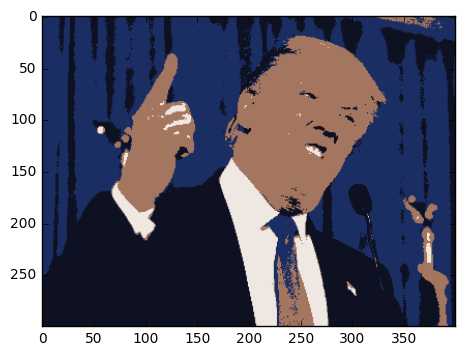

In [106]:
img = img.reshape((300, 400, 3))
plt.imshow(img)
plt.show()